<a href="https://colab.research.google.com/github/edanyi/ed_RCEL506/blob/main/11_20_CCS_Analysis_(2021_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Raw GHG Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [1]:
import pandas as pd
import numpy as np

# 2021 GHG emissions data
url1 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_data_2021.csv'
df1 = pd.read_csv(url1)

In [2]:
# Rows and columns
df1.shape

(6481, 66)

In [3]:
# All headings
print(list(df1.columns))

['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Zip Code', 'Address', 'County', 'Latitude', 'Longitude', 'Primary NAICS Code', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Total reported direct emissions', 'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ', 'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Other GHGs (metric tons CO2e)', 'Biogenic CO2 emissions (metric tons)', 'Stationary Combustion', 'Electricity Generation', 'Adipic Acid Production', 'Aluminum Production', 'Ammonia Manufacturing', 'Cement Production', 'Electronics Manufacture', 'Ferroalloy Production', 'Fluorinated GHG Production', 'Glass Production', 'HCFC22 Production from HFC23 Destruction', 'Hydrogen Production', 'Iron and Steel Production', 'Lead Production', 'Lime Production', 'Magnesium Production', 'Miscellaneous Use of Carbona

In [4]:
# Data preview

df1.head(3)

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
0,1004377,1.100000e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.30,-96.54,...,NaN,NaN,NaN,314493.75,NaN,NaN,NaN,N,N,N
1,1010040,1.100000e+11,15-18565/15-18662,Hazard,KY,40701,1021 Tori Drive,PERRY COUNTY,37.27,-83.24,...,NaN,112348.75,NaN,NaN,NaN,NaN,NaN,N,N,N
2,1000112,1.100000e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,-74.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [5]:
# Meta Data
# Checking for data type (int/float v. object) and missing data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 66 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Facility Id                                                      6481 non-null   int64  
 1   FRS Id                                                           6326 non-null   float64
 2   Facility Name                                                    6481 non-null   object 
 3   City                                                             6481 non-null   object 
 4   State                                                            6481 non-null   object 
 5   Zip Code                                                         6481 non-null   int64  
 6   Address                                                          6016 non-null   object 
 7   County                                    

### Data Cleaning

- Removing columns not relevant to analysis
- Separating into two dataframes - Facility Summary and Industry Emissions Summary
  - ***Facility Summary***: facility name/ID, state/city, latitude/longitude, regulation subparts, industry type, CO2e (including biogenic)
  - ***Industry Emissions Summary***: emissions by process/industry, checks for utilization and injection of CO2

#### Facility Summary

In [6]:
# Create new df for summary of site information
# Add column for Total CO2 emissions (sum of bio and non-bio CO2)

facilities=df1.iloc[:,[2,3,4,5,8,9,11,12,14,25]]
facilities.index=df1['Facility Id']
facilities['Biogenic CO2 emissions (metric tons)'].fillna(0,inplace=True)
facilities['CO2 emissions (non-biogenic) '].fillna(0,inplace=True)
facilities["Total CO2 Emissions (metric tons)"] = facilities['CO2 emissions (non-biogenic) '] + facilities["Biogenic CO2 emissions (metric tons)"]

facilities.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,33.30,-96.54,HH,Waste,0.0,0.0,0.0
1010040,15-18565/15-18662,Hazard,KY,40701,37.27,-83.24,FF,Other,0.0,0.0,0.0
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2


In [7]:
# Confirming "Total" column reflects sum of 'bio' and 'non-bio' CO2

facilities.loc[[1006208,1003188]]

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1006208,ADM CORN PROCESSING,CLINTON,IA,52732,41.82,-90.21,"C,TT","Other,Waste",2097852.2,101502.5,2199354.7
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2


In [8]:
# Checking if all data is present
# Exceptions - facilities with non-CO2 GHG emissions only (e.g. refrigerants)
# Exception - facilities with some or all CO2 emissions as biogenic

facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 1004377 to 1001640
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         6481 non-null   object 
 1   City                                  6481 non-null   object 
 2   State                                 6481 non-null   object 
 3   Zip Code                              6481 non-null   int64  
 4   Latitude                              6481 non-null   float64
 5   Longitude                             6481 non-null   float64
 6   Industry Type (subparts)              6481 non-null   object 
 7   Industry Type (sectors)               6481 non-null   object 
 8   CO2 emissions (non-biogenic)          6481 non-null   float64
 9   Biogenic CO2 emissions (metric tons)  6481 non-null   float64
 10  Total CO2 Emissions (metric tons)     6481 non-null   float64
dtypes: float

In [9]:
facilities.head()

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,33.30,-96.54,HH,Waste,0.0,0.0,0.0
1010040,15-18565/15-18662,Hazard,KY,40701,37.27,-83.24,FF,Other,0.0,0.0,0.0
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.83,-87.92,"C,HH",Waste,319.2,0.0,319.2
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2


In [10]:
# Removing facilities with only non-CO2 GHG emissions

co2_facilities = facilities[facilities['Total CO2 Emissions (metric tons)'] != 0]
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.83,-87.92,"C,HH",Waste,319.2,0.0,319.2
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2


In [11]:
# 5804 sources are applicable for this project

co2_facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804 entries, 1000112 to 1001640
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         5804 non-null   object 
 1   City                                  5804 non-null   object 
 2   State                                 5804 non-null   object 
 3   Zip Code                              5804 non-null   int64  
 4   Latitude                              5804 non-null   float64
 5   Longitude                             5804 non-null   float64
 6   Industry Type (subparts)              5804 non-null   object 
 7   Industry Type (sectors)               5804 non-null   object 
 8   CO2 emissions (non-biogenic)          5804 non-null   float64
 9   Biogenic CO2 emissions (metric tons)  5804 non-null   float64
 10  Total CO2 Emissions (metric tons)     5804 non-null   float64
dtypes: float

In [12]:
# Facilities not considered
# 5804 + 677 = 6481 total sources (as in original dataframe)

non_co2_facilities = facilities[facilities['Total CO2 Emissions (metric tons)'] == 0]
non_co2_facilities.shape

(677, 11)

In [13]:
non_co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,33.30,-96.54,HH,Waste,0.0,0.0,0.0
1010040,15-18565/15-18662,Hazard,KY,40701,37.27,-83.24,FF,Other,0.0,0.0,0.0
1004680,58TH ST LF (MAIN COUNTY LF),MIAMI,FL,33178,25.83,-80.35,HH,Waste,0.0,0.0,0.0


#### Industry Emissions Summary
- Creating dataframe for industrial sector emissions from each facility
- Facility may be reporting under multiple industrial sectors (i.e. subparts)

In [14]:
# Create new df for emissions data by industrial sector
# Include non-biogenic & biogenic data columns to allow for filtering

emissions = df1.loc[:,['CO2 emissions (non-biogenic) ','Biogenic CO2 emissions (metric tons)']]
emissions.index = df1['Facility Id']
sectors = df1.iloc[:,26:]
sectors.index = df1['Facility Id']
industries = pd.concat([emissions,sectors],axis=1) # concatenate df's together
industries.shape

(6481, 42)

In [15]:
# Exclude all sources reporting only non-CO2 GHGs (e.g. CH4, refrigerants, etc) 
# For each source, check if either biogenic or non-biogenic column has a value
# Only keep the sources that satisfy this condition - np.logical_or()

biogenic=industries['Biogenic CO2 emissions (metric tons)'].notna()
non_biogenic=industries['CO2 emissions (non-biogenic) '].notna()
co2_filter = np.logical_or(biogenic,non_biogenic)
co2_industries = industries[co2_filter]

# Drop non-biogenic & biogenic data columns

co2_industries=co2_industries.drop(columns=['Biogenic CO2 emissions (metric tons)',
                                            'CO2 emissions (non-biogenic) '])
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,163.300,45918.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,319.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7431.0,NaN,NaN,NaN,N,N,N
1003188,28117.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


## Regulatory Subpart Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [16]:
import pandas as pd
import numpy as np

# Regulatory subparts for each industry

url2 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_industries.csv'
df2 = pd.read_csv(url2)

In [17]:
# Setting index as the regulatory subpart letter

df2.index = df2['Subpart Letter']
subparts = df2.loc[:,['Name of industry','Facility Type']]
subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [18]:
# Checking if all data is present

subparts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, C to UU
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name of industry  56 non-null     object
 1   Facility Type     56 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


## Clean Data Summary

- 3 dataframes are generated to summarize the data for this analysis
  - ***co2_facilities***: all US industrial facilities that emit CO2 emissions (2021 data)
  - ***subparts***: correlates EPA GHG reporting program regulatory subpart (CFR Part 98) to each type of industry
  - ***co2_industries***: CO2 emissions for each facility, broken down by regulatory subpart (i.e. industry)

In [19]:
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.83,-87.92,"C,HH",Waste,319.2,0.0,319.2
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2


In [20]:
subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [21]:
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,163.300,45918.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,319.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7431.0,NaN,NaN,NaN,N,N,N
1003188,28117.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


# Industry Summaries


- Categorizing facilities by industry
- Perform basic statistics on each industrial sector
- Primary focus on the following industries (*priority_industries*):
  - Electricity Generation (Coal Power/Natural Gas)
  - Petroleum and Natural Gas Systems - Processing   
  - Ethanol (*not reported because biogenic*) 
  - Ammonia Manufacturing
  - Hydrogen Production
  - Cement Production
  - Petroleum Refining (FCC)
  - Iron and Steel Production
  - Stationary Combustion (Industrial Furnaces)

In [22]:
# Number of industries
# Last two columns are not industries

co2_industries.columns[:-3].nunique()

37

In [23]:
# Sum of facilities in each industry
# If missing value, facility does not belong to that industry/subpart

co2_industries.notna().sum()

Stationary Combustion                                              5424
Electricity Generation                                             1096
Adipic Acid Production                                                2
Aluminum Production                                                   7
Ammonia Manufacturing                                                29
Cement Production                                                    92
Electronics Manufacture                                              47
Ferroalloy Production                                                 8
Fluorinated GHG Production                                           14
Glass Production                                                    100
HCFC22 Production from HFC23 Destruction                              5
Hydrogen Production                                                 114
Iron and Steel Production                                           122
Lead Production                                                 

In [24]:
# Basic statistics for each industry
# Note - the cells without values are not counted

co2_industries['Electricity Generation'].describe()

count    1.096000e+03
mean     1.404045e+06
std      2.285165e+06
min      0.000000e+00
25%      8.800352e+04
50%      4.878936e+05
75%      1.652994e+06
max      2.099862e+07
Name: Electricity Generation, dtype: float64

In [25]:
# Function to plot histogram for one industrial sectors
# Option for Sturge's rule for number of bins

def histogram(header):

  import seaborn as sns
  import matplotlib.pyplot as plt

  #bin_count = 1 + np.ceil(np.log2(co2_industries[header].count()))   
  bin_count = 8 + np.ceil(np.log2(co2_industries[header].count()))    
  fig, ax = plt.subplots()
  sns.histplot(data=co2_industries[header],bins=int(bin_count))
  ax.set_xlabel("CO2 Emissions (mtpa)")
  ax.set_ylabel("# of Facilities",rotation=0,labelpad=45)
  ax.set_title(header)


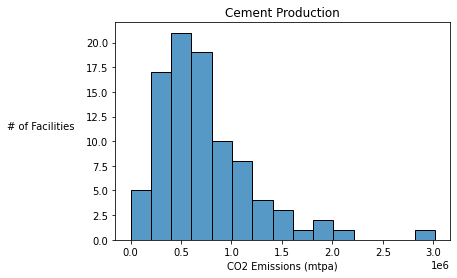

In [26]:
histogram('Cement Production')

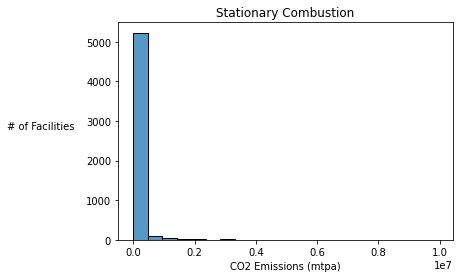

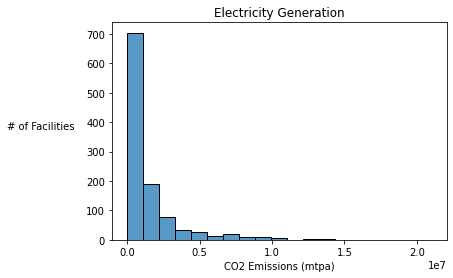

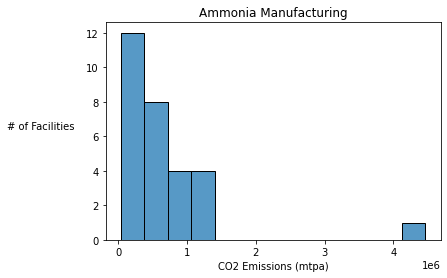

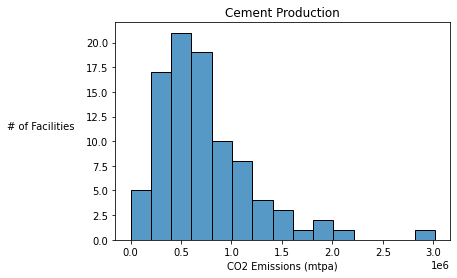

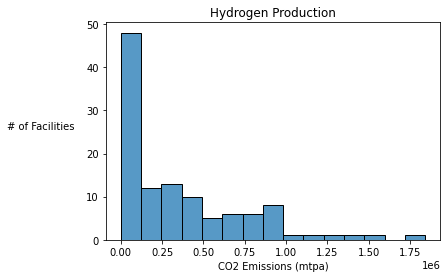

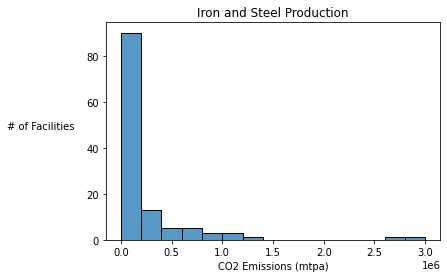

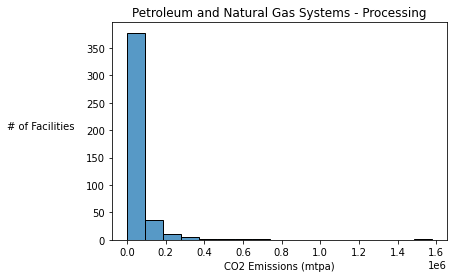

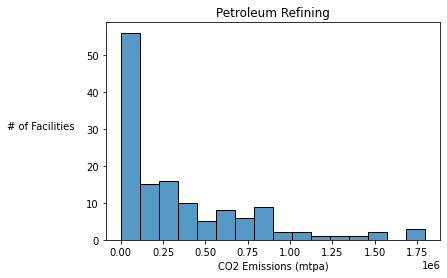

In [27]:
# Only considering priority industries

priority_industries = co2_industries.iloc[:,[0,1,4,5,11,12,19,25]]

for labels,content in priority_industries.items():
  histogram(labels)
  

Text(0.5, 0, 'CO2 Emissions (mtpa)')

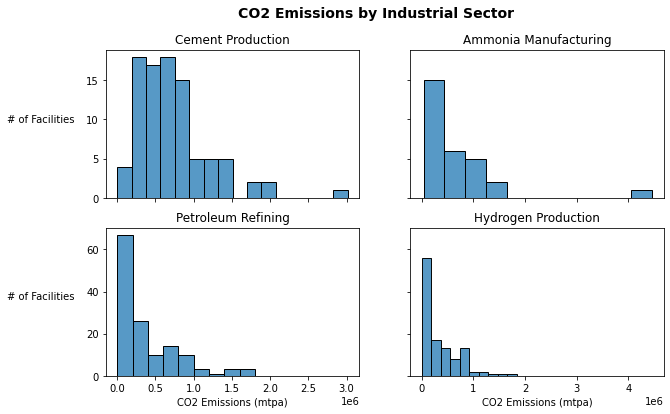

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,2,figsize=(10,6),sharex='col',sharey='row')

fig.suptitle("CO2 Emissions by Industrial Sector", fontweight = "bold",fontsize=14,y=.98)

sns.histplot(data=co2_industries['Cement Production'],ax=axs[0,0])
axs[0,0].set_title('Cement Production')
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("# of Facilities",rotation=0,labelpad=45)

sns.histplot(data=co2_industries['Ammonia Manufacturing'],ax=axs[0,1])
axs[0,1].set_title('Ammonia Manufacturing')
axs[0,1].set_ylabel("")
axs[0,1].set_xlabel("")

sns.histplot(data=co2_industries['Petroleum Refining'],ax=axs[1,0])
axs[1,0].set_title('Petroleum Refining')
axs[1,0].set_ylabel("# of Facilities",rotation=0,labelpad=45)
axs[1,0].set_xlabel("CO2 Emissions (mtpa)")

sns.histplot(data=co2_industries['Hydrogen Production'],ax=axs[1,1])
axs[1,1].set_title('Hydrogen Production')
axs[1,1].set_ylabel("")
axs[1,1].set_xlabel("CO2 Emissions (mtpa)")

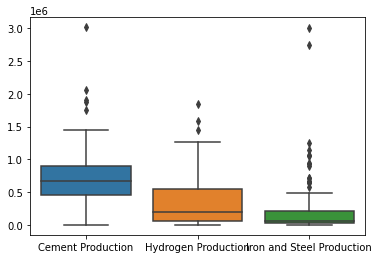

In [29]:
# Box plot

co2_industries.iloc[:,[0,25]]
sns.boxplot(data=co2_industries.iloc[:,[5,11,12]])
plt.show()

# Facility Classification

- Classify each facility into it's respective industrial sectors (i.e. based on regulatory subpart)
  - Extract values from 'Industry Type (subparts)' columns
  - Sort individual subparts into separate new columns in the dataframe
  - Correlate subpart(s) to industry type(s) using *subparts( )* dataframe

## Separate string of subparts into separate elements

In [30]:
co2_facilities.loc[:,'Industry Type (subparts)']

Facility Id
1000112             C,D
1003742            C,HH
1003188             C,N
1005043               C
1003739             C,N
               ...     
1012921        C,W-NGTC
1006154        C,W-NGTC
1003436        C,W-NGTC
1000912    C,D,W-LNGSTG
1001640      C,W-LNGSTG
Name: Industry Type (subparts), Length: 5804, dtype: object

In [31]:
# For each row, test splitting element contents separated by a comma

co2_facilities.loc[1013621,'Industry Type (subparts)'].split(',')

['C', 'W-PROC']

In [32]:
# To determine individual subparts for each facility,
# First count number of individual subparts for each facility
# Create new column in dataframe to hold the total subparts per facility
# New column equals the old column with lambda function applied
# lambda syntax = variables:operations 
# Determine length of string created by the split function

co2_facilities['# of Subparts']=co2_facilities['Industry Type (subparts)'].apply(lambda x:len(x.split(',')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# Function to split element contents separated by a comma
# For each element, use an index to count each subpart
# Once # of subparts exceeds the index, function returns nan 

def splitter(value,index):
  try:
    return value.split(',')[index]
  except:
    return np.nan

In [34]:
# Test - facility 1013621 has two subparts (index = 0,1,nan,...)

splitter(co2_facilities.loc[1013621,'Industry Type (subparts)'],1)

'W-PROC'

In [35]:
# Create new column for first subpart of each facility (index = 0)
# New column equals the old column with lambda function applied
# Lambda function uses splitter() function to split element and select indexed item in list

co2_facilities['Subpart 1']=co2_facilities['Industry Type (subparts)'].apply(lambda x:splitter(x,0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
# Test - new column created, containing only first subpart in the list

co2_facilities['Subpart 1']

Facility Id
1000112    C
1003742    C
1003188    C
1005043    C
1003739    C
          ..
1012921    C
1006154    C
1003436    C
1000912    C
1001640    C
Name: Subpart 1, Length: 5804, dtype: object

In [37]:
# For the entire column, testing the maximum number of subparts for a facility

co2_facilities['# of Subparts'].max()

6

In [38]:
# Loop to create 6 columns (maximum number of subparts for a given facility)

for n in range(1,7):
  co2_facilities['Subpart '+str(n)]=co2_facilities['Industry Type (subparts)'].apply(lambda x:splitter(x,n-1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2,2,C,D,NaN,NaN,NaN,NaN
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.83,-87.92,"C,HH",Waste,319.2,0.0,319.2,2,C,HH,NaN,NaN,NaN,NaN
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2,2,C,N,NaN,NaN,NaN,NaN


## Replace subpart letter with industry name

In [40]:
# Looking to swap Subpart letter in co2_facilities with industry name

subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [41]:
# Test filter of facilities by individual subpart

stat_combustion = co2_facilities[co2_facilities['Subpart 1']==subparts.index[0]]
stat_combustion.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,46035.2,2,C,D,NaN,NaN,NaN,NaN
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.83,-87.92,"C,HH",Waste,319.2,0.0,319.2,2,C,HH,NaN,NaN,NaN,NaN
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,28214.2,2,C,N,NaN,NaN,NaN,NaN


In [42]:
# Replace all subpart letters with industry name

co2_facilities['Subpart 1'] = co2_facilities['Subpart 1'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 2'] = co2_facilities['Subpart 2'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 3'] = co2_facilities['Subpart 3'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 4'] = co2_facilities['Subpart 4'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 5'] = co2_facilities['Subpart 5'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 6'] = co2_facilities['Subpart 6'].replace(to_replace=subparts.index,value=subparts['Name of industry'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [43]:
# Test check for facilities reporting under 4 or more subparts

co2_facilities[co2_facilities['# of Subparts']>4].head()

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,
1004962,Ascend Performance Materials LLC,Cantonment,FL,32533,30.60,-87.25,"C,E,P,TT,V","Chemicals,Waste",1216191.6,0.0,1216191.6,5,Stationary Combustion,Adipic Acid Production,Hydrogen Production,Industrial Waste Landfills,Nitric Acid Production,NaN
1006301,BORGER REFINERY,BORGER,TX,79008,35.70,-101.36,"C,MM-REF,P,TT,Y","Chemicals,Petroleum Product Suppliers,Refineri...",1441408.3,0.0,1441408.3,5,Stationary Combustion,Petroleum Refinery (Producer),Hydrogen Production,Industrial Waste Landfills,Petroleum Refining,NaN
1006468,BP CHERRY POINT REFINERY,BLAINE,WA,98230,48.88,-122.74,"C,MM-REF,P,PP,Y","Chemicals,Petroleum Product Suppliers,Refineri...",2199670.9,0.0,2199670.9,5,Stationary Combustion,Petroleum Refinery (Producer),Hydrogen Production,Carbon Dioxide (CO2) Supply,Petroleum Refining,NaN
1007339,BP Whiting Business Unit,WHITING,IN,46394,41.67,-87.48,"C,D,DD,MM-REF,P,Y","Chemicals,Other,Petroleum Product Suppliers,Po...",5057759.8,0.0,5057759.8,6,Stationary Combustion,Electricity Generation,SF6 from Electrical Equipment,Petroleum Refinery (Producer),Hydrogen Production,Petroleum Refining
1007367,BPE GPRP Grasslands Gas Plant,Cartwright,ND,58838,47.59,-104.00,"C,NN-FRAC,PP,UU,W-PROC","Injection of CO2,Natural Gas and Natural Gas L...",60045.2,0.0,60045.2,5,Stationary Combustion,Natural Gas Liquids Fractionator,Carbon Dioxide (CO2) Supply,Injection of Carbon Dioxide,Petroleum and Natural Gas Systems-Natural Gas ...,NaN


# Economic Calculations

## Calculation Basis

- The 45Q tax code creates the acceptance criteria for an economic CCS project in the US, with the incentive of $85/tCO2 available for permanent geologic sequestration
- Value chain costs include: 
  - CO2 capture - depends largely on total volume and CO2 purity in stream
  - CO2 transport - pipeline inch-mile benchmarks, costs may depend on region
  - CO2 storage - facility and injection wells

**CAPEX**: total capital expense (million dollars) of CO2 capture facility may be determined with reference case and scaling factor based on facility capacity
  - $X$ = facility capacity (mtpa CO2)
  - *mtpa* = million tonnes per annum

$$ \large CAPEX_{2} = CAPEX_{1} \cdot (\frac{X_{2}}{X_{1}})^{0.7} $$

**OPEX**: operating expense can be broken into variable costs (energy use) and fixed costs (non-energy use)
- *Gas*: $3/MMBTU

- *Electricity*: $50/MWh

$$ \large OPEX_{fix} ($M/yr) = CAPEX \cdot \%Non-Energy \;\; Use $$
$$\;$$

$$ \large OPEX_{var} ($/t) = (MWh/t) \cdot ($/MWh) $$

**Capital Charge Rate**: incorporates inflation rate, discount rate, and economic life of the overall project to annualize the CAPEX
  - $CCR$ = capital charge rate
  - $d$ = discount rate (i.e., rate of return)
  - $n$ = project economic life (years)
  - $l$ = levelization factor (incorporates inflation into the first year CCR)

$$ \large CCR = \frac{[d \cdot (1+d)^{n}] \cdot l}{(1+d)^{n}-1} $$

**Cost of Capture**: cost to capture CO2 from an industrial facility in $ per tonne of CO2 capture

  - $CCR$ = capital charge rate
  - $X$ = facility capacity (mtpa CO2)
  - *mtpa* = million tonnes per annum

$$ \large $/tCO_{2} = \frac{(CCR \cdot CAPEX) + OPEX_{fix}}{X} + OPEX_{var}$$



In [44]:
# Calculate CCR

d=0.12
n=15
i=0.02
l = (((1+d)**n-1)/(d*(1+d)**n))/((1-(1+i)**n*(1+d)**(-n))/(d-i))

CCR = (d*(1+d)**n)/((1+d)**n-1)*l
print('CCR =',round(CCR*100,1),'%')

CCR = 13.3 %


In [45]:
# Test calculation for capture cost

CAPEX = 300
OPEX = 10
X = 0.70

cost = (CCR*CAPEX+OPEX)/X
print("Cost of CO2 Capture: $"+str(round(cost,0))+'/tonne CO2')


Cost of CO2 Capture: $71.0/tonne CO2


In [46]:
# Test calculation for scaling to new facility from reference case

X2 = 0.5
CAPEX2 = CAPEX*(X2/X)**0.7
OPEX2 = OPEX*(X2/X)

cost2 = (CCR*CAPEX2+OPEX2)/X2
print("Cost of CO2 Capture: $"+str(round(cost2,0))+'/tonne CO2')

Cost of CO2 Capture: $77.0/tonne CO2


## Import Reference Data

*Use values from NPC CCUS Study for reference data (https://dualchallenge.npc.org/)*

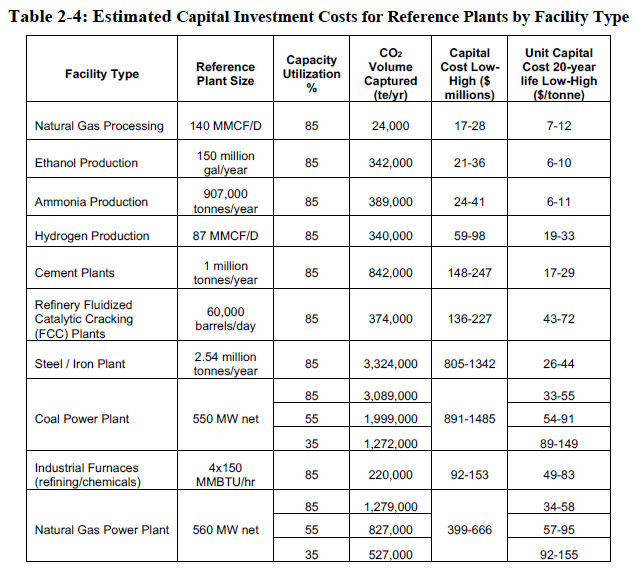

In [47]:
# Create new dataframe to reflect these values
# Import from tabula was not effective

e_cost = 50   # $/MWh
g_cost = 3    # $/MMBTU
facility_type = ['Petroleum and Natural Gas Systems - Natural Gas Processing','Ethanol Production','Ammonia Manufacturing','Hydrogen Production','Cement Production','Petroleum Refining (FCC)','Iron and Steel Production','Electricity Generation (Coal)','Stationary Combustion','Electricity Generation (Natural Gas)']
co2_ref = [0.24,0.342,0.389,0.340,0.842,0.374,3.324,3.089,0.22,1.279]     # mtpa CO2
CAPEX_ref = [17,21,24,59,148,136,805,891,92,399]                          # $M
non_energy = [0.06,0.07,0.05,0.05,0.07,0.04,0.05,0.04,0.04,0.05]          # % of CAPEX
electricity = [0.1,0.12,0.1,0.18,0.16,0.14,0.16,0.16,0.16,0.16]           # MWh/tCO2
gas = [0,0,0,2.6,2.6,2.6,2.6,2.6,2.6,2.8]                                 # MMBTU/tCO2

NPC_dict = {"Reference Volume (mtpa CO2)":co2_ref,"CAPEX ($M)":CAPEX_ref,"Electricity Cost ($/t)":electricity,"Gas Cost ($/t)":gas}
NPC = pd.DataFrame(NPC_dict)
NPC.index=facility_type
NPC['Non-Energy OPEX ($M/yr)'] = NPC['CAPEX ($M)']*non_energy
NPC['Electricity Cost ($/t)'] = NPC['Electricity Cost ($/t)']*e_cost
NPC['Gas Cost ($/t)'] = NPC['Gas Cost ($/t)']*g_cost
NPC


,Reference Volume (mtpa CO2),CAPEX ($M),Electricity Cost ($/t),Gas Cost ($/t),Non-Energy OPEX ($M/yr)
Petroleum and Natural Gas Systems - Natural Gas Processing,0.240,17,5.0,0.0,1.02
Ethanol Production,0.342,21,6.0,0.0,1.47
Ammonia Manufacturing,0.389,24,5.0,0.0,1.20
Hydrogen Production,0.340,59,9.0,7.8,2.95
Cement Production,0.842,148,8.0,7.8,10.36
Petroleum Refining (FCC),0.374,136,7.0,7.8,5.44
Iron and Steel Production,3.324,805,8.0,7.8,40.25
Electricity Generation (Coal),3.089,891,8.0,7.8,35.64
Stationary Combustion,0.220,92,8.0,7.8,3.68
Electricity Generation (Natural Gas),1.279,399,8.0,8.4,19.95


In [48]:
# Test calculation

CAPEX_NG = NPC.loc['Petroleum and Natural Gas Systems - Natural Gas Processing',"CAPEX ($M)"]
OPEX_NG = NPC.loc['Petroleum and Natural Gas Systems - Natural Gas Processing',"Non-Energy OPEX ($M/yr)"]
X_NG = NPC.loc['Petroleum and Natural Gas Systems - Natural Gas Processing',"Reference Volume (mtpa CO2)"]
e_NG = NPC.loc['Petroleum and Natural Gas Systems - Natural Gas Processing',"Electricity Cost ($/t)"]
g_NG = NPC.loc['Petroleum and Natural Gas Systems - Natural Gas Processing',"Gas Cost ($/t)"]

cost_NG = ((CCR*CAPEX_NG+OPEX_NG)/X_NG)+e_NG+g_NG
print(NPC.index[0]+': $'+str(round(cost_NG,0))+'/tonne CO2')

Petroleum and Natural Gas Systems - Natural Gas Processing: $19.0/tonne CO2


## 45Q Tax Credit Eligibility

**Qualification**
- Subpart D (Electricity Generation) > 18.8 ktpa CO2
- Other Industrials > 12.5 ktpa CO2


In [49]:
# 5968 facilities currently in dataframe
 
co2_facilities.shape

(5804, 18)

In [50]:
# Number of power plants which do not qualify for 45Q

low_power = co2_facilities[(co2_facilities['Industry Type (sectors)'] == 'Power Plants') & (co2_facilities['Total CO2 Emissions (metric tons)'] < 18800)].index
low_power.shape

(122,)

In [51]:
# Drop 122 facilities which do not qualify

co2_facilities.drop(low_power,inplace=True)
co2_facilities.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(5682, 18)

In [52]:
low_industrials = co2_facilities[co2_facilities['Total CO2 Emissions (metric tons)'] < 12500].index
low_industrials

Int64Index([1003742, 1001845, 1003038, 1001637, 1006963, 1005284, 1004236,
            1003780, 1003562, 1003201,
            ...
            1012448, 1005759, 1013315, 1009738, 1004916, 1005985, 1003681,
            1012897, 1002079, 1001640],
           dtype='int64', name='Facility Id', length=835)

In [53]:
# Number of other industrial facilities which do not qualify for 45Q

low_industrials = co2_facilities[co2_facilities['Total CO2 Emissions (metric tons)'] < 12500].index
low_industrials.shape

(835,)

In [54]:
# Drop 835 remainining facilities which do not qualify

co2_facilities.drop(low_industrials,inplace=True)
co2_facilities.shape

(4847, 18)

# Capture Cost Calculations (by facility)

- Pair up benchmark values in NPC index to calculate indicative CO2 capture cost ($/tCO2) for each facility
- Challenges: sources without benchmark, Ethanol production, Refinery FCCs (from Petroleum Refining), and distinguishing power plants (Coal v. Natural Gas)

In [55]:
print(list(NPC.index))

['Petroleum and Natural Gas Systems - Natural Gas Processing', 'Ethanol Production', 'Ammonia Manufacturing', 'Hydrogen Production', 'Cement Production', 'Petroleum Refining (FCC)', 'Iron and Steel Production', 'Electricity Generation (Coal)', 'Stationary Combustion', 'Electricity Generation (Natural Gas)']


In [56]:
# Calculate CAPEX relative to benchmark

def CAPEX(industry,capacity_new):
  CAPEX_ref = NPC.loc[industry,'CAPEX ($M)']
  capacity_ref = NPC.loc[industry,'Reference Volume (mtpa CO2)']
  CAPEX_new = CAPEX_ref*(capacity_new/capacity_ref/1000000)**0.7
  return CAPEX_new

CAPEX('Ethanol Production',250000)

16.863939153519816

In [57]:
# Calculate CAPEX for each facility, relative to benchmark
# Note: pulling CO2 emissions from individual subpart in "co2_industries"

# Generate list of column names to iterate over

headers = []
for n in range(1,7):
  headers.append("Subpart "+str(n))

# Iterate over each subpart part column
# Iterate rows of the column, create CAPEX column and calculate value
# Note: using CO2 emissions from individual subpart in "co2_industries"

for i,header in enumerate(headers):
  for label,row in co2_facilities.iterrows():
    check = co2_facilities.loc[label,header] in NPC.index # returns True / False
    if check == True:
      sector = co2_facilities.loc[label,header]
      value = CAPEX(sector,co2_industries.loc[label,sector]) # Calculate CAPEX
      co2_facilities.loc[label,"CAPEX "+str(i+1)] = round(value,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [61]:
co2_facilities.head(50)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),...,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6,CAPEX 1,CAPEX 2,CAPEX 3,CAPEX 5
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,46035.2,0.0,...,Stationary Combustion,Electricity Generation,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,28214.2,0.0,...,Stationary Combustion,Glass Production,NaN,NaN,NaN,NaN,21.8,NaN,NaN,NaN
1005043,3M CO,MAPLEWOOD,MN,55144,44.95,-93.00,C,Other,82686.6,0.0,...,Stationary Combustion,NaN,NaN,NaN,NaN,NaN,46.4,NaN,NaN,NaN
1003739,3M CO - GUIN,GUIN,AL,35563,33.97,-87.90,"C,N",Minerals,31098.7,0.0,...,Stationary Combustion,Glass Production,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN
1007698,3M CO - WAUSAU DOWNTOWN,WAUSAU,WI,54401,44.95,-89.64,C,Other,41177.0,0.0,...,Stationary Combustion,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,NaN
1004206,3M COMPANY,DECATUR,AL,35609,34.64,-87.04,"C,L,OO","Chemicals,Industrial Gas Suppliers",43951.6,0.0,...,Stationary Combustion,Fluorinated GHG Production,Non-CO2 Industrial Gas Supply,NaN,NaN,NaN,29.8,NaN,NaN,NaN
1006665,3M CORDOVA,CORDOVA,IL,61242,41.76,-90.28,"C,L,OO","Chemicals,Industrial Gas Suppliers",31109.2,0.0,...,Stationary Combustion,Fluorinated GHG Production,Non-CO2 Industrial Gas Supply,NaN,NaN,NaN,23.4,NaN,NaN,NaN
1004836,3M Cottage Grove Center - Site,Cottage Grove,MN,55016,44.79,-92.91,"C,L,N,OO","Chemicals,Industrial Gas Suppliers,Minerals",48316.1,2103.0,...,Stationary Combustion,Fluorinated GHG Production,Glass Production,Non-CO2 Industrial Gas Supply,NaN,NaN,31.6,NaN,NaN,NaN
1003408,3M INDUSTRIAL MINERAL PRODUCTS DIVISION,LITTLE ROCK,AR,72206,34.71,-92.25,C,Other,32621.6,0.0,...,Stationary Combustion,NaN,NaN,NaN,NaN,NaN,24.2,NaN,NaN,NaN
